# 2164 Full resolution pairs of grayscaled+groundtruth label images
The pairs of images were generated from a [previous dataset](https://github.com/jeanpat/DeepFISH/blob/master/dataset/overlapping_chromosomes_examples.h5?raw=true) which suffered from several defects both in the grayscale and in the ground truth components:

   * The grayscaled images could suffer from two problems:
       * Some images had black dots: those images were removed (with the corresponding groundtruth)
       * The images dtype is now *np.uint8*
       * The overlapping domain is now more realistic compared with real overlapping chromosomes
   * The labels of the groundtruth don't have no more spurious pixels



In [2]:
import numpy as np
from scipy import ndimage as nd
from matplotlib import pyplot as plt

In [1]:
!wget https://github.com/jeanpat/DeepFISH/blob/master/dataset/Cleaned_FullRes_2164_overlapping_pairs.npz?raw=true
!mv Cleaned_FullRes_2164_overlapping_pairs.npz?raw=true Clean2164.npz

--2020-01-30 16:48:29--  https://github.com/jeanpat/DeepFISH/blob/master/dataset/Cleaned_FullRes_2164_overlapping_pairs.npz?raw=true
Résolution de github.com (github.com)… 140.82.118.4
Connexion à github.com (github.com)|140.82.118.4|:443… connecté.
requête HTTP transmise, en attente de la réponse… 302 Found
Emplacement : https://github.com/jeanpat/DeepFISH/raw/master/dataset/Cleaned_FullRes_2164_overlapping_pairs.npz [suivant]
--2020-01-30 16:48:29--  https://github.com/jeanpat/DeepFISH/raw/master/dataset/Cleaned_FullRes_2164_overlapping_pairs.npz
Réutilisation de la connexion existante à github.com:443.
requête HTTP transmise, en attente de la réponse… 302 Found
Emplacement : https://raw.githubusercontent.com/jeanpat/DeepFISH/master/dataset/Cleaned_FullRes_2164_overlapping_pairs.npz [suivant]
--2020-01-30 16:48:30--  https://raw.githubusercontent.com/jeanpat/DeepFISH/master/dataset/Cleaned_FullRes_2164_overlapping_pairs.npz
Résolution de raw.githubusercontent.com (raw.githubuserconte

In [27]:
# There's a trick to load and uncompress a numpy .npz array
# https://stackoverflow.com/questions/18231135/load-compressed-data-npz-from-file-using-numpy-load/44693995
#
dataset = np.load('Clean2164.npz')
data = dataset.f.arr_0
data.shape

(2164, 190, 189, 2)

#### Have a look to the downloaded images

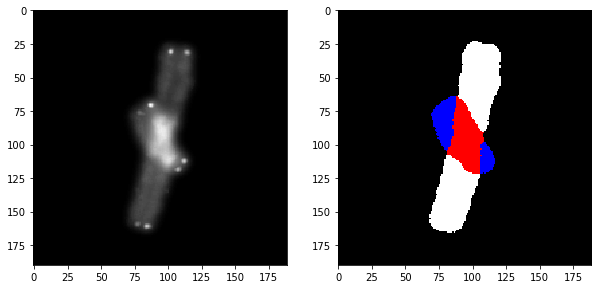

In [25]:
N=203
plt.figure(figsize=(10,8))
plt.subplot(121)
plt.imshow(data[N,:,:,0], cmap=plt.cm.gray)
plt.subplot(122)
plt.imshow(data[N,:,:,1], cmap=plt.cm.flag_r)

### The same dataset saved as a hdf5 file can be downloaded

In [29]:
!wget https://github.com/jeanpat/DeepFISH/blob/master/dataset/Cleaned_FullRes_2164_overlapping_pairs.h5?raw=true
!mv Cleaned_FullRes_2164_overlapping_pairs.h5?raw=true Clean2164.h5

--2020-01-30 22:49:04--  https://github.com/jeanpat/DeepFISH/blob/master/dataset/Cleaned_FullRes_2164_overlapping_pairs.h5?raw=true
Résolution de github.com (github.com)… 140.82.118.4
Connexion à github.com (github.com)|140.82.118.4|:443… connecté.
requête HTTP transmise, en attente de la réponse… 302 Found
Emplacement : https://github.com/jeanpat/DeepFISH/raw/master/dataset/Cleaned_FullRes_2164_overlapping_pairs.h5 [suivant]
--2020-01-30 22:49:05--  https://github.com/jeanpat/DeepFISH/raw/master/dataset/Cleaned_FullRes_2164_overlapping_pairs.h5
Réutilisation de la connexion existante à github.com:443.
requête HTTP transmise, en attente de la réponse… 302 Found
Emplacement : https://raw.githubusercontent.com/jeanpat/DeepFISH/master/dataset/Cleaned_FullRes_2164_overlapping_pairs.h5 [suivant]
--2020-01-30 22:49:05--  https://raw.githubusercontent.com/jeanpat/DeepFISH/master/dataset/Cleaned_FullRes_2164_overlapping_pairs.h5
Résolution de raw.githubusercontent.com (raw.githubusercontent.co

In [32]:
import h5py
filename = './Clean2164.h5'
h5f = h5py.File(filename,'r')
pairs = h5f['chroms_data'][:]
h5f.close()
print('dataset is a numpy array of shape:', pairs.shape)

dataset is a numpy array of shape: (2164, 190, 189, 2)
